# Case study on Image classification:

# Context:
- We are given a **dataset** which contains image data. 
- The data contains **pixel values** of the images in csv format. 
- Each image represents one of the number from 0, 1, 2, ..., 8, 9. So there are 10 possible outcomes for each row of data. As the data contains the pixel values of the image in each row. 
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter shade. 
- This pixel-value is an integer between 0 and 255, inclusive.
- The data set has 785 columns. 
- The first column, called "label", is the digit which is in the image. 
- *The* rest of the columns contain the pixel-values of the associated image.

# Problem:
- Classify the image based on the pixel value.
- The result of the model should be the number which is represented by the pixel values.
- Use Supervised Learning method for it.

# Data:
- **label:** A value between 0 and 9. Both inclusive. Total 10 unique values.
- **pixel0, pixel1, pixel2, ..., pixel782, pixel783:** Each value in these columns is between 0 and 255. Which represents the pixel intensity. 

In [1]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

## Loading the data
- We use panda's read_csv to read train.csv into a dataframe.
- Then we separate our images and labels for supervised learning.
- We also do a train_test_split to break our data into two sets, one for training and one for testing. This let's us measure how well our model was trained by later inputting some known test data.

In [2]:
SEED=123
FILE_NAME = "dataset_week_1.csv"

In [5]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',200)

In [6]:
data = pd.read_csv(FILE_NAME)

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [8]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [9]:
# The labels for images.
y = data["label"]

Let's see some of the labels.

In [10]:
print(y[0])               # Label for 1st image.
print(y[2000])            # Label for 2001st image.

1
3


### Now let's prepare the data according to the model input.

##Add on:

What should we do to prepare the data according to the model input?

Let's see in the next steps.

In [55]:
# Drop 'label' column.
X = data.drop(columns= ["label"])

## Think about it:

Do we know, how the data distribution looks like across all the numbers?

i.e. We need to know the images corresponding to each number.

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    1002
7    1001
6    1001
3    1001
9    1001
1    1001
8    1001
4    1000
2    1000
0    1000
Name: label, dtype: int64

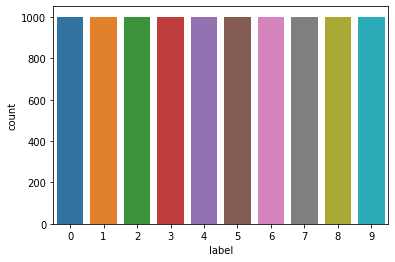

In [12]:
g = sns.countplot(y)
y.value_counts()

### We can see from the above plot that the data is evenly distributed among all the classes (from 0, 1, 2, ..., 8, 9). So, the dataset is perfectly balanced.

## Add-on:
- What type of classification is this?
- If we are to use neural networks, what activation functions do we need in the output layer?

## Think about it:

Have we checked if our data has any missing values?

# Check for null and missing values

In [13]:
# Check the data
missing_values = X.isnull().sum()
print(missing_values[missing_values>0].index)

Index([], dtype='object')


#### I checked for corrupted images (missing values inside).


#### There is no missing values in the dataset. So we can safely go ahead.

## Think about it:

- Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
- As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Normalization
- We perform a grayscale normalization

In [15]:
#1 - 255

1/255

0.00392156862745098

In [16]:
(1/255)/(255/255)

0.00392156862745098

In [56]:
# Normalize the data
X = X.astype('float32') / 255.0

## Add-on:
Overfitting? Why or why not?

## Add on:

- When using Neural Networks, Normalization helps. (Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.)
- As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/


In [57]:
X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [18]:
# Split data into test and train to build the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=SEED)


In [19]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

In [20]:
len(X_train[0])

784

In [21]:
28*28

784

#### We can get a better sense for one of these examples by visualising the image and looking at the label.

# Viewing an Image
- Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
- Then, we plot the image and label with matplotlib

##### You can change the value of variable i to check out other images and labels.¶

In [26]:
i = 1
img = X[i]
img.reshape((28,28)).shape

(28, 28)

Text(0.5, 1.0, '0')

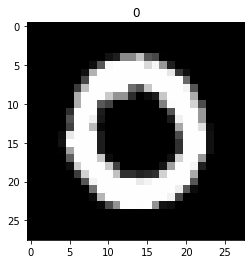

In [27]:
i=1
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

## Add-on:
- What is `X[i]`'s shape?
- How to reshape the whole array instead of just one row?
- What's the shape of the reshaped array?

### In the original data, the pixel values were in a 1-Dimensional array.
### We converted that 1-D array of 784 pixel values into an 2-D array of shape (28 X 28).
### Note that 28 multiplied by 28 is equal to 784.
### As each pixel value represents dark or white spot, when we plot the 28x28 pixel's array, we get the above image.
### So, it validates the fact that image can be represented by an numpy array.
### Each value of the above numpy array represents a pixel, which has value between 0 and 255.

# Examining the Pixel Values:
- Note that these images aren't actually black and white (0,1). They are gray-scale (0-255).
- A histogram of this image's pixel values shows the range.

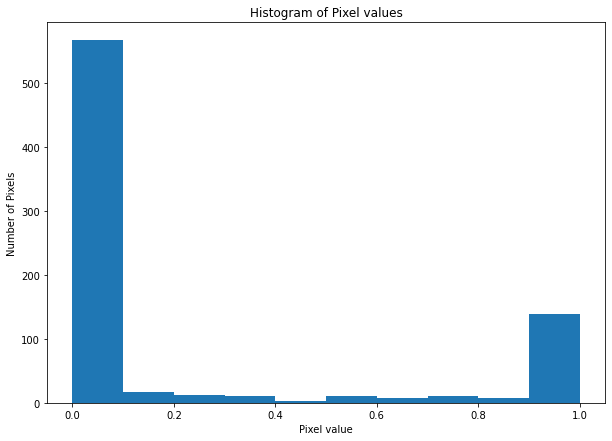

In [28]:
plt.figure(figsize=(10,7), edgecolor='blue')

n, bins, patches = plt.hist(X[1], bins=10, range=(0.0, 1.0))
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

## Think about it:

What is the interpretation of the above plot regarding:
- The pixel values: on x-axis.
- Number of such pixels: on y-axis.

## Think about it:

- Have we visualized the image yet? How do they look?

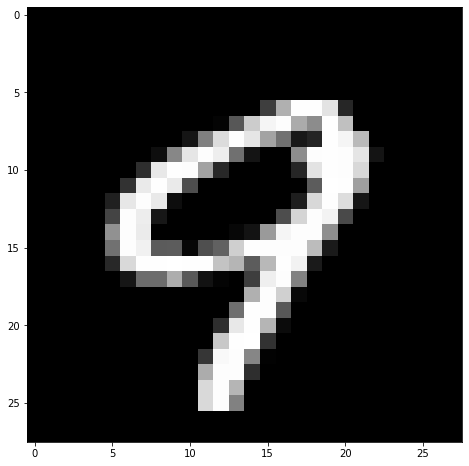

In [29]:
i=100                             # We have choosed an image from the dataset with i=100, i.e. 101th image.
img = X[i]                        
img = img.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(img, cmap='gray');

## Think about it:

- Why did we used the .reshape() function, and what is significance of (28,28)?

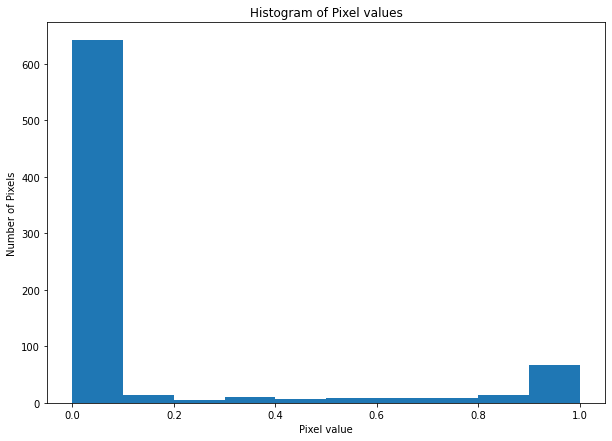

In [30]:
plt.figure(figsize=(10,7), edgecolor='blue')

counts, bins, bars = plt.hist(X[i])
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

## Think about it:

- What does the height = 641 mean?
Similarly other height values in the result.
- The width is same for all = 0.1

### Let's visualze some other image:

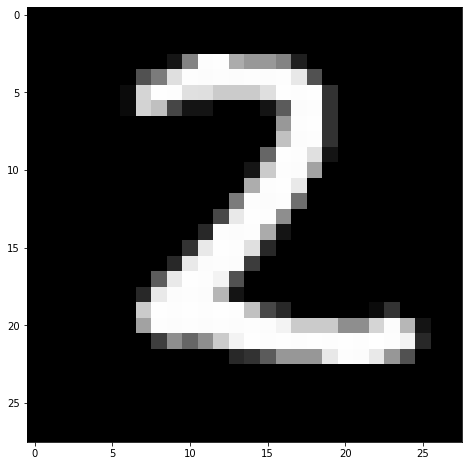

In [31]:
i=101
img = X[i]                        
img = img.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(img, cmap='gray');

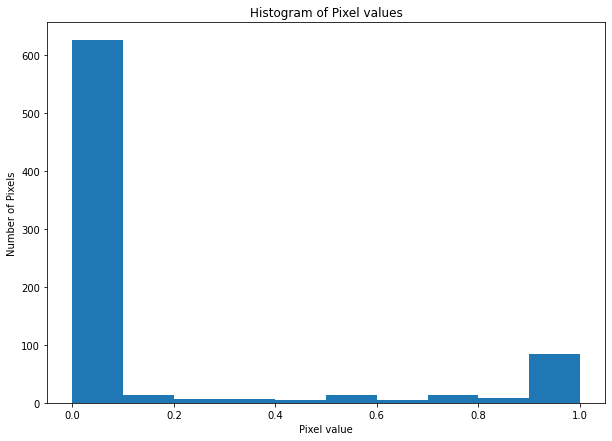

In [32]:
plt.figure(figsize=(10,7), edgecolor='blue')

counts, bins, bars = plt.hist(X[i])
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

### From above histogram, we can see that the there are more number of pixels which have value equal to zero. 
### Zero value represents black pixel.
### From the image we saw before, we observed that the black portion of image was more than the white portion.
### It confirms that white pixel is represented by value equal to 1.

----------------------------------------------------

## Think about it:

- What should be our next step while understanding about the images?

# Training our model
- First, we use the sklearn.ensemble module to create a **random forest classifier**.
- Next, we pass our training images and labels to the classifier's fit method, which trains our model.
- Finally, the test images and labels are passed to the score method to see how well we trained our model. Score will return a float between 0-1 indicating our accuracy on the test data set

##### Try playing with the parameters of RandomForestClassifier() to see how the results change.¶

In [33]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=SEED)
clf.fit(X_train, y_train)

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [34]:
clf.score(X_test, y_test)

0.9068745003996802

In [35]:
y_pred = clf.predict(X_test)

In [ ]:
np.nonzero([1,0,1,0])

In [ ]:
np.nonzero(y_pred!=y_test)

Text(0.5, 1.0, '7')

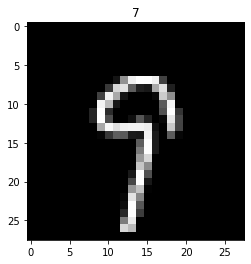

In [36]:
i = 1042
img = X_test[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred[i])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[247   0   0   1   0   1   7   0   3   0]
 [  0 252   2   0   2   0   0   1   0   0]
 [  7   3 227   3   2   1   0   3   3   1]
 [  2   0   6 236   1   4   0   3   3   2]
 [  1   4   3   0 245   3   0   3   2  18]
 [  7   2   2  16   3 206   4   2   6   1]
 [  2   0   6   1   2   4 214   0   0   0]
 [  1   1   5   1   4   1   0 222   0   5]
 [  4   3   6   2   1   8   4   1 208   4]
 [  1   1   1   5  11   3   2   5   0 212]]


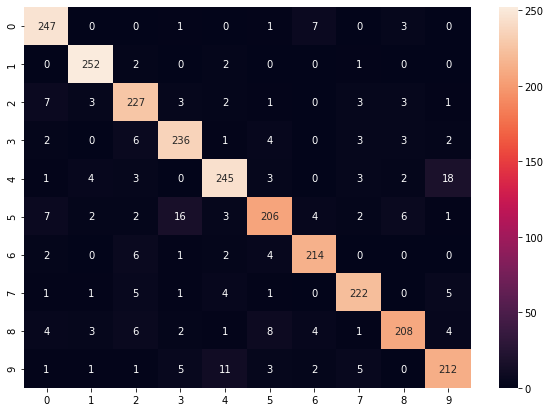

In [39]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

### So, we got a pretty good accuracy on classification of the images of digits, as the classification report shows.

# Using Gaussian Blurring in Pre-Processing:
- Now we'll use **gaussian blurring** in the **pre-processing**.
- And see how it affects the **model accuracy**.

### To apply gaussian blurring:
- We have to convert the flattened 1-D array to 2-D array.
- The shape of 2-D array is 28x28 pixels.
- Then we apply gaussian blurring filter to each of the image.
- After applying filter, we have to convert the 2-D array to 1-D array with shape 784 pixels. So that we can feed that into the traditional supervised learning algorithm as we did in the case above.

In [58]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 10008 numbers, each of which has 784 pixels. (It's the shape of the numpy array)

10008
(10008, 784)


In [59]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((10008, 28, 28))

In [60]:
new_x.shape

(10008, 28, 28)

In [61]:
# We can see that each digit is made of 784 pixels.
X[0].shape 

(784,)

In [62]:
# In the following step, we iterate through each row, and convert the 1-D array of 784 pixels to an array of 28x28 pixels 2-D array. 
for idx, line in enumerate(X):
    new_x[idx] = line.reshape((28, 28))

In [63]:
new_x.shape

(10008, 28, 28)

## Add-on:

walk-through the code :)

In [64]:
# Here we see that the length of new dataset after application of Gaussian Blurring filter is same as previous one.
# i.e. Total number of images is same.
len(new_x)

10008

In [65]:
# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
    new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)
    

Text(0.5, 1.0, '0')

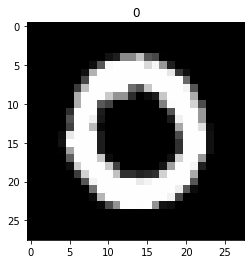

In [66]:
i = 1
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

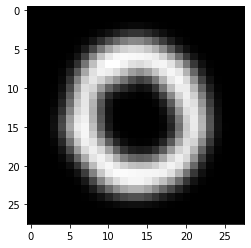

In [67]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[i], cmap='gray')
#plt.title(y[i])

## Please Note:
NEVER loop through a numpy array or pandas df! Use vectorized operations instead!
https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html

## Add-on:
- How to do this with vectorized operations?


In [68]:
X.shape

(10008, 784)

In [69]:
def my_func(a):
    print(a)
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1])

b = np.array([[1,2,3,4], [4,5,6,7], [7,8,9,10]])

In [70]:
b.shape

(3, 4)

In [71]:
b

array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 7,  8,  9, 10]])

In [72]:
np.apply_along_axis(my_func, 1, b)

[1 2 3 4]
[4 5 6 7]
[ 7  8  9 10]


array([ 5, 11, 17])

In [ ]:
np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 1), 
    -1, 
    X.reshape((-1, 28, 28))
)

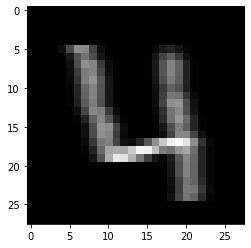

In [73]:
X_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    -1, 
    X.reshape((-1, 28, 28))
)
X_new = X_new.reshape((-1, 28, 28))
plt.imshow(X_new[3], cmap='gray')

### By looking at the above image, we can clearly see the difference after the application of the Gaussian Blurring filter, the image noise is reduced, the image is more smooth now.

In [ ]:
X_new.shape

In [ ]:
# Now we create another empty numpy array of 10008 rows and 784 columns shape, to store the pixel values, which are obtained by applying the Gaussian Blur.
# The new array is necessary as we have to feed the data in the model in this original format.
another_x = np.empty((10008, 784))

In [ ]:
# Append/Set the values of the another array to be fed into model equal to the flattened array, which has the shape of 784 pixels (1-D)
for idx, img in enumerate(new_x):
    another_x[idx] = img.flatten()


In [ ]:
another_x.shape

## Add-on:
How to avoid the for loop and use `reshape` to do the same?

# Examining the Pixel Values:
- Note that these images aren't actually black and white (0,1). They are gray-scale (0-255).
- A histogram of this image's pixel values shows the range.

In [74]:
X_new.shape

(10008, 28, 28)

In [75]:
another_x = X_new.reshape((10008, 784))
another_x.shape

(10008, 784)

(array([631.,  23.,  28.,  33.,  24.,  29.,   6.,   3.,   2.,   5.]),
 array([0.        , 0.09083333, 0.18166667, 0.2725    , 0.36333333,
        0.45416667, 0.545     , 0.63583333, 0.72666667, 0.8175    ,
        0.90833333]),
 <a list of 10 Patch objects>)

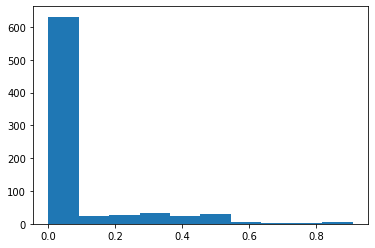

In [76]:
plt.hist(another_x[3])

(array([691.,   7.,  18.,   4.,   5.,   6.,   6.,  12.,   9.,  26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

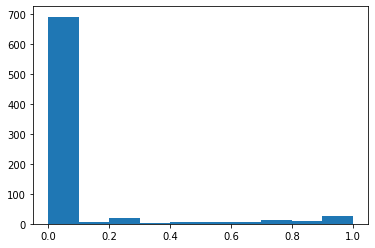

In [77]:
plt.hist(X[3])

# From the above histogram we can clearly see that after application of Gaussian blur, the image is changed slightly. The pixel intensity histogram is different this time.

In [78]:
# Split the new data (another_x) and y into train and test set.
# Note that we used the same y (labels) as before, as the labels have values between 0 to 9. So, there is no connection between the Gaussian blur and the...
# ...labels, so we can use it as it is.
X_train_gaussian, X_test_gaussian, y_train_gaussian, y_test_gaussian = train_test_split(another_x,
                                                                                        y,
                                                                                        train_size=0.75,
                                                                                        random_state=SEED)


# Training our model
- First, we use the sklearn.ensemble module to create a **Random Forest classifier**.
- Next, we pass our training images and labels to the classifier's fit method, which trains our model.
- Finally, the test images and labels are passed to the score method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

##### Try playing with the parameters of RandomForestClassifier() to see how the results change.¶

In [79]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf_gaussian = RandomForestClassifier(random_state=SEED)
clf_gaussian.fit(X_train_gaussian, y_train_gaussian)

/Users/vinodgattani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [80]:
clf_gaussian.score(X_test_gaussian, y_test_gaussian)

0.9176658673061551

# Here we can clearly see that the accuracy is increased after applying the Gaussian Blur.

In [81]:
y_pred_gaussian = clf_gaussian.predict(X_test_gaussian)

Text(0.5, 1.0, '7')

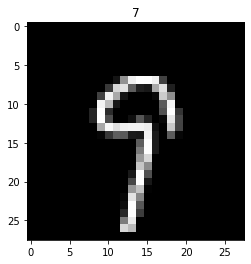

In [86]:
i=1042
img = X_test[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred[i])

Text(0.5, 1.0, '9')

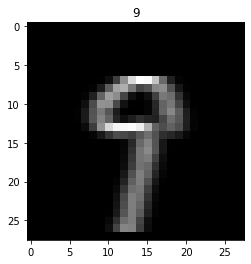

In [87]:
i = 1042
img = X_test_gaussian[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred_gaussian[i])

In [ ]:
np.nonzero(y_pred!=y_pred_gaussian)

## Add-on:
- What's the problem with the above conclusion?
- How to solve it?

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_gaussian, y_pred_gaussian)
print(cm)

=== Confusion Matrix ===
[[253   0   0   0   0   0   1   0   5   0]
 [  0 247   3   0   3   1   0   0   3   0]
 [  1   4 229   6   2   0   0   4   4   0]
 [  0   0   4 238   0   9   0   3   1   2]
 [  1   0   3   1 254   1   2   5   2  10]
 [  5   2   1  14   2 220   2   0   2   1]
 [  2   1   4   0   4   1 215   0   1   1]
 [  1   0   5   2   2   0   0 220   1   9]
 [  3   6   2   5   3   1   2   2 216   1]
 [  4   0   2   2  17   1   1   8   2 204]]


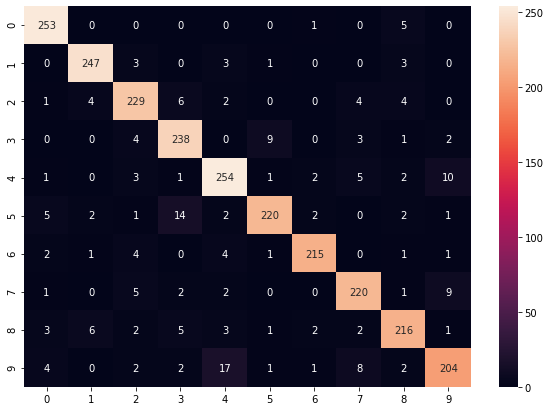

In [90]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

### So, we got a pretty good accuracy on classification of the images of digits, as the classification report shows.

# In this mentor learning session we learnt that:
- The images can be represented using numpy array.
- If the array is 1-D, then we can visualize the image after reshaping the array to suitable shape. In this case we converted it to 2-D array.
- We visualized the image by plotting the numpy array using matplotlib.
- After that we saw that the pixel values' distribution in histogram, the black pixel's value is zero, and the white pixel's value is 1. These values are after normalization of pixel values, i.e. after dividing each value by 255.
- We used RandomForestClassifier as supervised classification method.
- We also used Gaussian Blurring as pre-processing method, and saw that there is improvement in the accuracy of model.
- During process of applying Gaussian Blurring, we also used certain reshaping techniques, which should be kept in mind, as it is important to know how the shape of array plays an important role in the image classification, their visualizaion.

## Add-on:
Algorithms vs. Models